In [37]:
import sys

sys.path.append("..")
import torch
from utils.zernike import zern_abb
from utils.pupil import polymask
from utils.psf import psf
from matplotlib import pyplot as plt
from methods.proj_methods import gerchberg_saxton, fienup_hio
from utils.fourier import ft2, ift2
from utils.metrics import strehl, corr
import torch.optim as optim
import torch.nn as nn
from methods.xi_encoded_inr import INR_xi_encoded
from utils.dataset_prep import pupil_dataset
from utils.dataset_prep import s2p_alphas_betas
from utils.zernike import zernike_gram_schmidt
import math
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

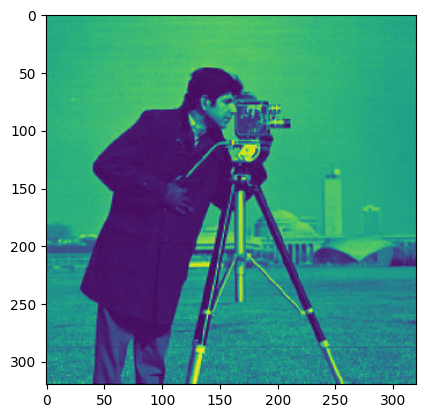

In [38]:
img = plt.imread('C:/Users/nchim/Downloads/cameraman.jpg')
plt.imshow(img)
plt.show()

In [39]:
L = 1000
N = 320
pupil, scale = pupil_dataset('circle', N)
alphas = 8 * (torch.rand(L, 36) - 0.5)
alphas[:, :3] = 0
phases = zern_abb(
    N, alphas, 0.4681
)  # 0.4681 for fairness across pupil shapes (explained in supp)
psfs = psf(pupil, phases)

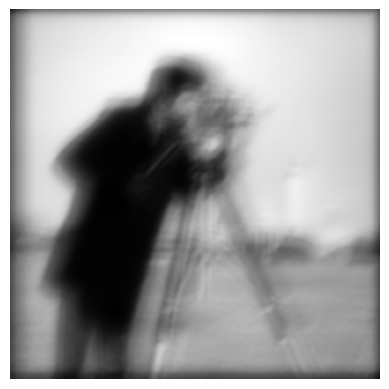

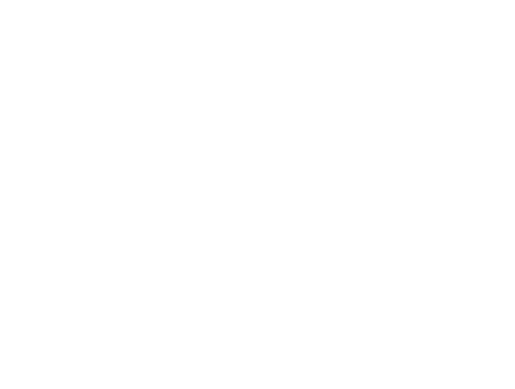

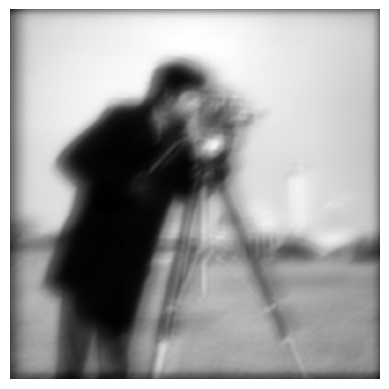

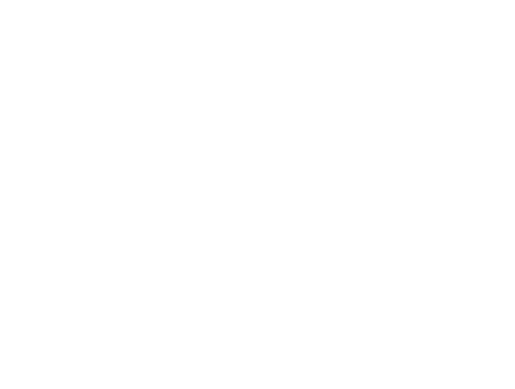

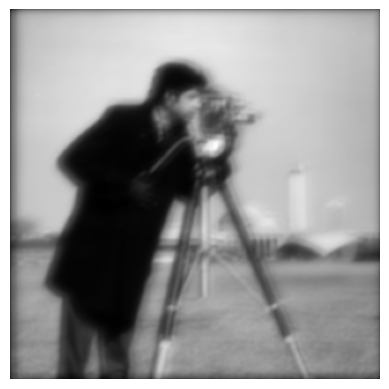

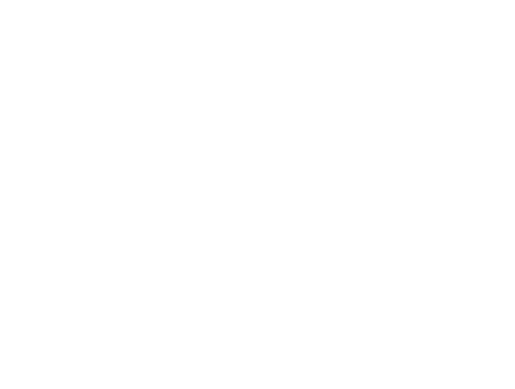

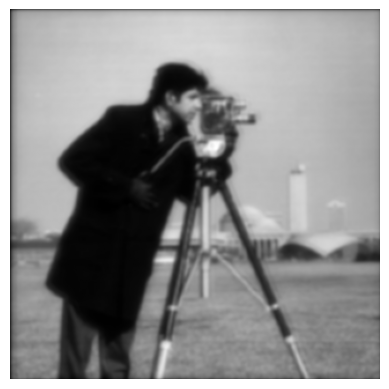

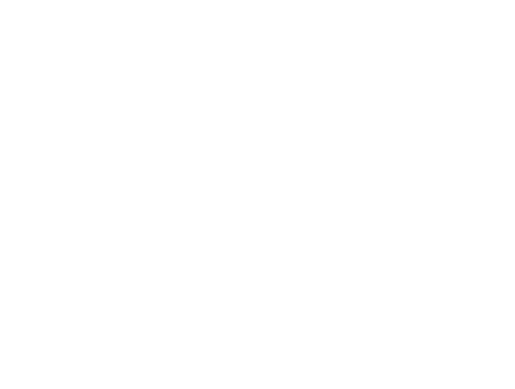

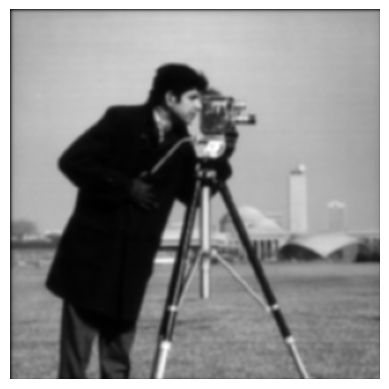

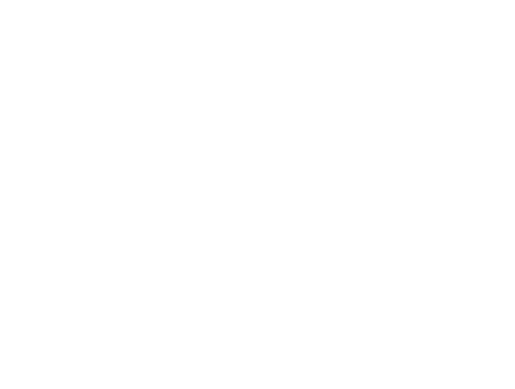

In [51]:
att = torch.linspace(1, 0.01, 5)
for i in range(5):
    psfs = psf(pupil, phases * att[i])
    temp_psf = psfs[0] / torch.sum(psfs[0])
    # out = torch.abs(ift2(ft2(psfs[0]) * ft2(torch.from_numpy(img))))
    out = fftconvolve(temp_psf.numpy(), img, mode='same')
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.imsave(f'psf{i}.png', psfs[0][130:-130, 130:-130], cmap='gray')
    plt.axis('off')
    plt.show()